## Business Understanding

### Used Car Price Prediction

This task is to predict the prices of used cars in Nigeria

In [3]:
# loading libraries for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
# reading the data from my storage
used_car = pd.read_csv(r"C:\Users\USER\Documents\python file\loan.csv\car_scrape.csv")
used_car.head() #shows me the first five rows of my data

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,120412,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,67640,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,92440,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,5790000,2013


In [3]:
# checking the shape of the data
print(f'The shape of the data is {used_car.shape}')

The shape of the data is (1451, 10)


In [4]:
# checking the data info
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1451 non-null   object
 1   odometer      1451 non-null   int64 
 2   location      1451 non-null   object
 3   isimported    1451 non-null   object
 4   engine        1451 non-null   object
 5   transmission  1451 non-null   object
 6   fuel          1451 non-null   object
 7   paint         1451 non-null   object
 8   price         1451 non-null   int64 
 9   year          1451 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 113.5+ KB


In [5]:
# checking for missing values
used_car.isnull().sum()

title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
price           0
year            0
dtype: int64

### Explorative data analysis (EDA)

<Figure size 720x576 with 0 Axes>

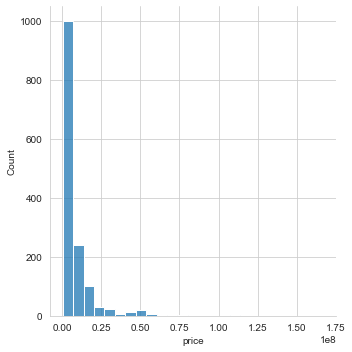

In [19]:
# checking the distribution of the price in the data
plt.figure(figsize=(10,8))
sns.displot(x='price', data=used_car, bins=25)

<Figure size 720x576 with 0 Axes>

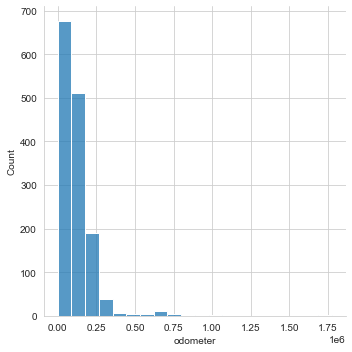

In [6]:
# checking the distribution of the odometer
plt.figure(figsize=(10,8))
sns.displot(x='odometer', data=used_car, bins=20)

In [16]:
used_car['price'].mean(), used_car['price'].median() #checking the average price and the middle price in the data

(8431088.232253619, 4215000.0)

<AxesSubplot:xlabel='odometer', ylabel='price'>

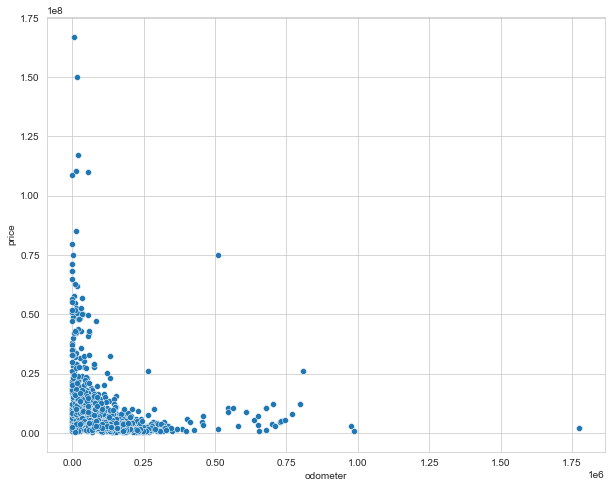

In [11]:
# This plot shows the relationship between odometer and Price
plt.figure(figsize=(10,8))
sns.scatterplot(x='odometer', y='price', data=used_car)

<AxesSubplot:xlabel='odometer', ylabel='price'>

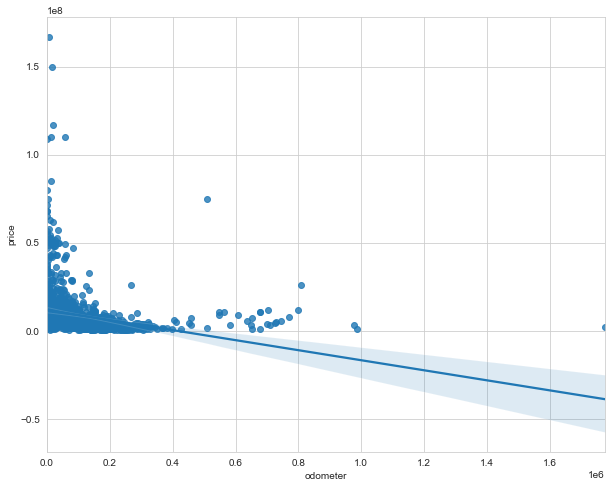

In [12]:
plt.figure(figsize=(10,8))
sns.regplot(x='odometer', y='price', data=used_car)

The plot above shows a negative relationship between the price and odometer i.e an increase in the price implies a decrease in the odometer

In [23]:
used_car.head(2)

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009


In [7]:
#checking the location of the most used cars in the data
plt.figure(figsize=(10,8)) 
used_car['location'].value_counts()

Lagos                1130
Abuja                 214
Ogun                   34
Lagos                  34
Lagos State            21
other                   5
Ogun State              2
FCT                     2
Abuja                   2
Abia                    2
Accra                   1
Adamawa                 1
Arepo ogun state        1
Mushin                  1
Abia State              1
Name: location, dtype: int64

<Figure size 720x576 with 0 Axes>

In [33]:
used_car['location'].unique()

array(['Lagos', 'Abuja', 'Lagos ', 'Ogun', 'Lagos State', 'Adamawa ',
       'other', 'Abia State', 'Arepo ogun state ', 'Ogun State', 'Abuja ',
       'Abia', 'FCT', 'Accra', 'Mushin'], dtype=object)

In [10]:
# reformating the variables in the location column because of the multiple entries of lagos and Abuja in the line above
used_car['location'] = used_car['location'].replace('Lagos ', 'Lagos') 
used_car['location'] = used_car['location'].replace('Lagos State', 'Lagos')
used_car['location'] = used_car['location'].replace('Abuja ', 'Abuja')

In [11]:
used_car['location'].unique()

array(['Lagos', 'Abuja', 'Ogun', 'Adamawa ', 'other', 'Abia State',
       'Arepo ogun state ', 'Ogun State', 'Abia', 'FCT', 'Accra',
       'Mushin'], dtype=object)

<AxesSubplot:>

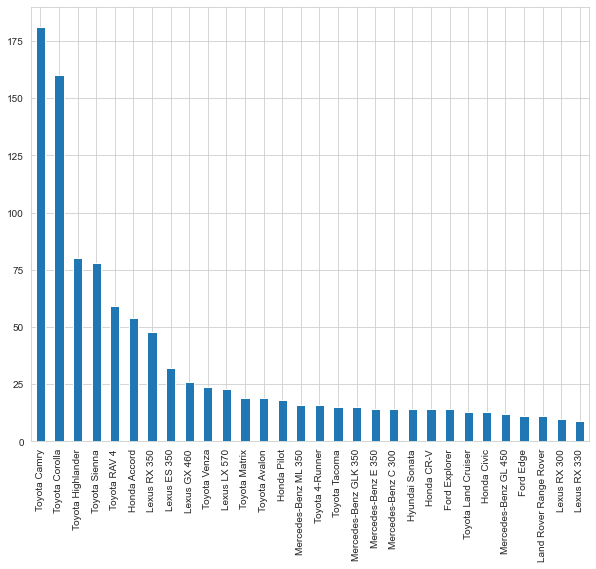

In [9]:
#plot showing the most used cars in the data
plt.figure(figsize=(10,8))
used_car['title'].value_counts().head(30).plot.bar()

### With the plot above if you want to invest in car business in Nigeria it would be advisable to invest in toyota,honda and lexus because it would bring you a good investment in return.

<AxesSubplot:>

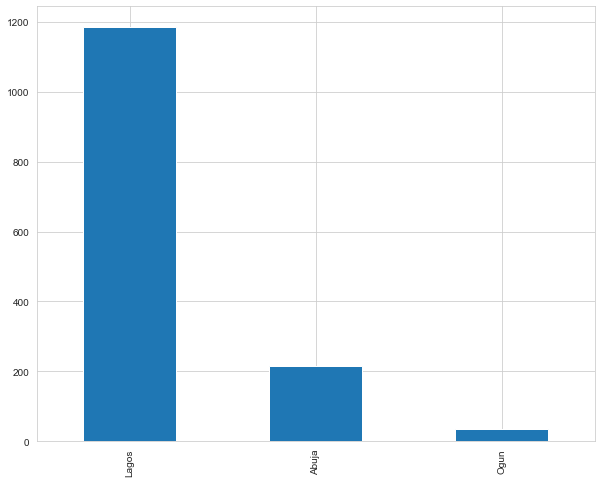

In [39]:
# plot showing the location with highest presence of cars in the data
plt.figure(figsize=(10,8))
used_car['location'].value_counts().head(3).plot.bar()

### The plot above shows where you would sell most of this car models

In [53]:
used_car.head(2)

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009


<AxesSubplot:xlabel='isimported', ylabel='price'>

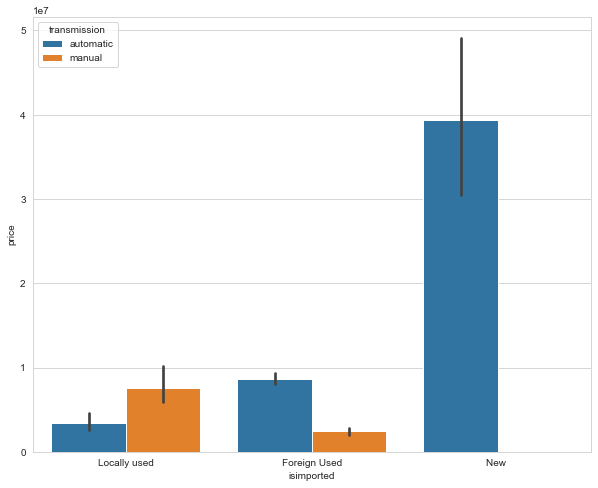

In [56]:
# plotshowing the difference in isimported or not and their prices in respect of the transmission in the data
plt.figure(figsize=(10,8))
sns.barplot(x='isimported', y='price', hue='transmission', data=used_car)

<AxesSubplot:>

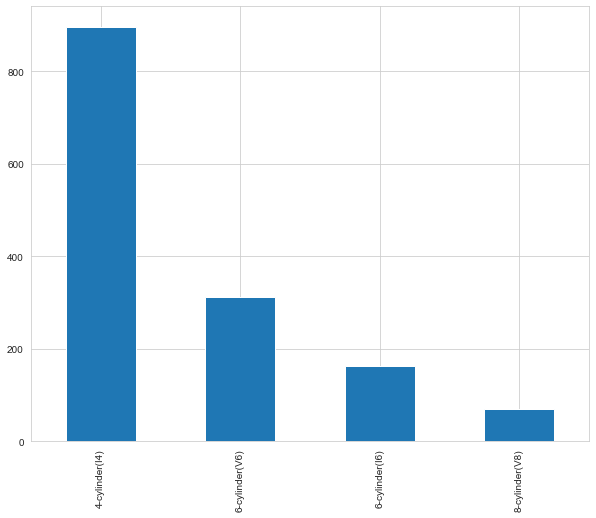

In [60]:
# plot showing the most used engines in the data 
plt.figure(figsize=(10,8))
used_car['engine'].value_counts().head(4).plot.bar()

<AxesSubplot:xlabel='odometer', ylabel='engine'>

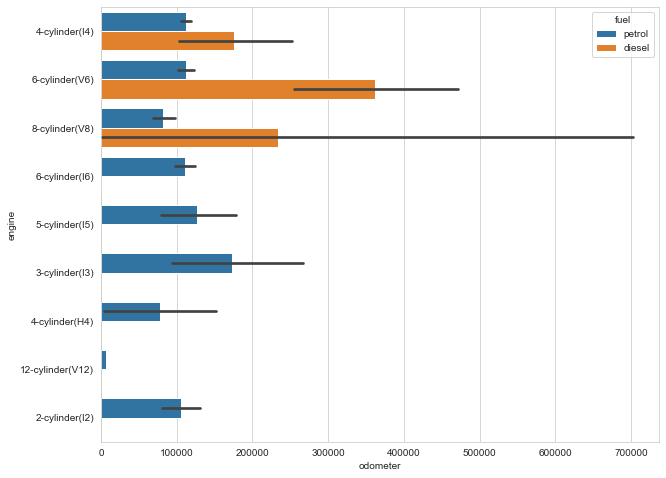

In [66]:
# plot showing the mean of the distance covered-odometer by the respective engine type
plt.figure(figsize=(10,8))
sns.barplot(y='engine', x='odometer', hue='fuel', data=used_car)

<AxesSubplot:xlabel='price', ylabel='engine'>

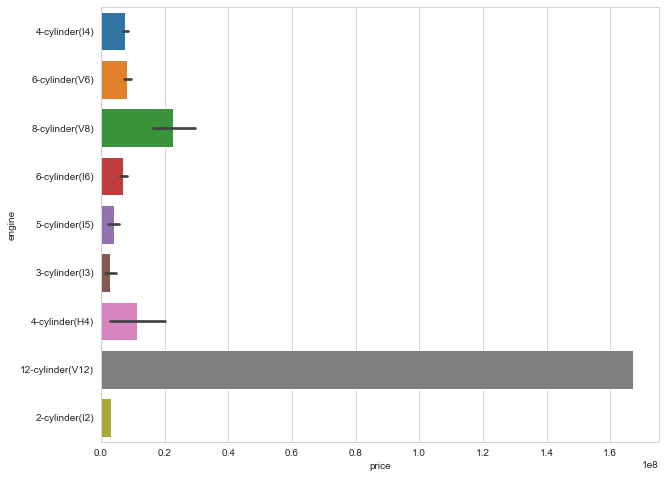

In [65]:
# plot showing the mean price of the respective engine type
plt.figure(figsize=(10,8))
sns.barplot(y='engine', x='price', data=used_car)

###  Thank you